<a href="https://colab.research.google.com/github/GitOlivier10/biodiversity-starter/blob/main/biodiversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Config espace

In [98]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import kendalltau, spearmanr
from scipy.stats import skew

In [99]:
import pandas as pd

# URL du fichier observations.csv sur GitHub pointing to the raw data file
observations_url = "https://raw.githubusercontent.com/GitOlivier10/biodiversity-starter/main/observations.csv"

# Importer le fichier CSV
observations_csv = pd.read_csv(observations_url)

# Afficher les données
display(observations_csv)

# URL du fichier species_info.csv sur GitHub pointing to the raw data file
species_info_url = "https://raw.githubusercontent.com/GitOlivier10/biodiversity-starter/main/species_info.csv"

# Importer le fichier CSV
species_info_csv = pd.read_csv(species_info_url)

# Afficher les données
display(species_info_csv)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [100]:
import pandas as pd

# URL du fichier observations.csv sur GitHub
observations_url = "https://raw.githubusercontent.com/GitOlivier10/biodiversity-starter/main/observations.csv"

# Importer le fichier CSV
observations_csv = pd.read_csv(observations_url)

# Afficher les données
display(observations_csv)

# URL du fichier species_info.csv sur GitHub
species_info_url = "https://raw.githubusercontent.com/GitOlivier10/biodiversity-starter/main/species_info.csv"

# Importer le fichier CSV
species_info_csv = pd.read_csv(species_info_url)

# Afficher les données
display(species_info_csv)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [101]:
df_merged = observations_csv.merge(species_info_csv, on='scientific_name', how='inner')
new_order = ['scientific_name', 'common_names', 'category', 'park_name', 'observations', 'conservation_status']
df_merged = df_merged[new_order]
display(df_merged)

,scientific_name,common_names,category,park_name,observations,conservation_status
0,Vicia benghalensis,"Purple Vetch, Reddish Tufted Vetch",Vascular Plant,Great Smoky Mountains National Park,68,NaN
1,Neovison vison,American Mink,Mammal,Great Smoky Mountains National Park,77,NaN
2,Prunus subcordata,Klamath Plum,Vascular Plant,Yosemite National Park,138,NaN
3,Abutilon theophrasti,Velvetleaf,Vascular Plant,Bryce National Park,84,NaN
4,Githopsis specularioides,Common Bluecup,Vascular Plant,Great Smoky Mountains National Park,85,NaN
...,...,...,...,...,...,...
25627,Croton monanthogynus,Prairie Tea,Vascular Plant,Yosemite National Park,173,NaN
25628,Otospermophilus beecheyi,California Ground Squirrel,Mammal,Bryce National Park,130,NaN
25629,Heterotheca sessiliflora ssp. echioides,Sessileflower False Goldenaster,Vascular Plant,Bryce National Park,140,NaN
25630,Dicranella rufescens,Dicranella Moss,Nonvascular Plant,Yosemite National Park,171,NaN


We merged the frames, now we are gonna clean the data


In [102]:
print(df_merged.dtypes)

scientific_name        object
common_names           object
category               object
park_name              object
observations            int64
conservation_status    object
dtype: object


Exploration of data

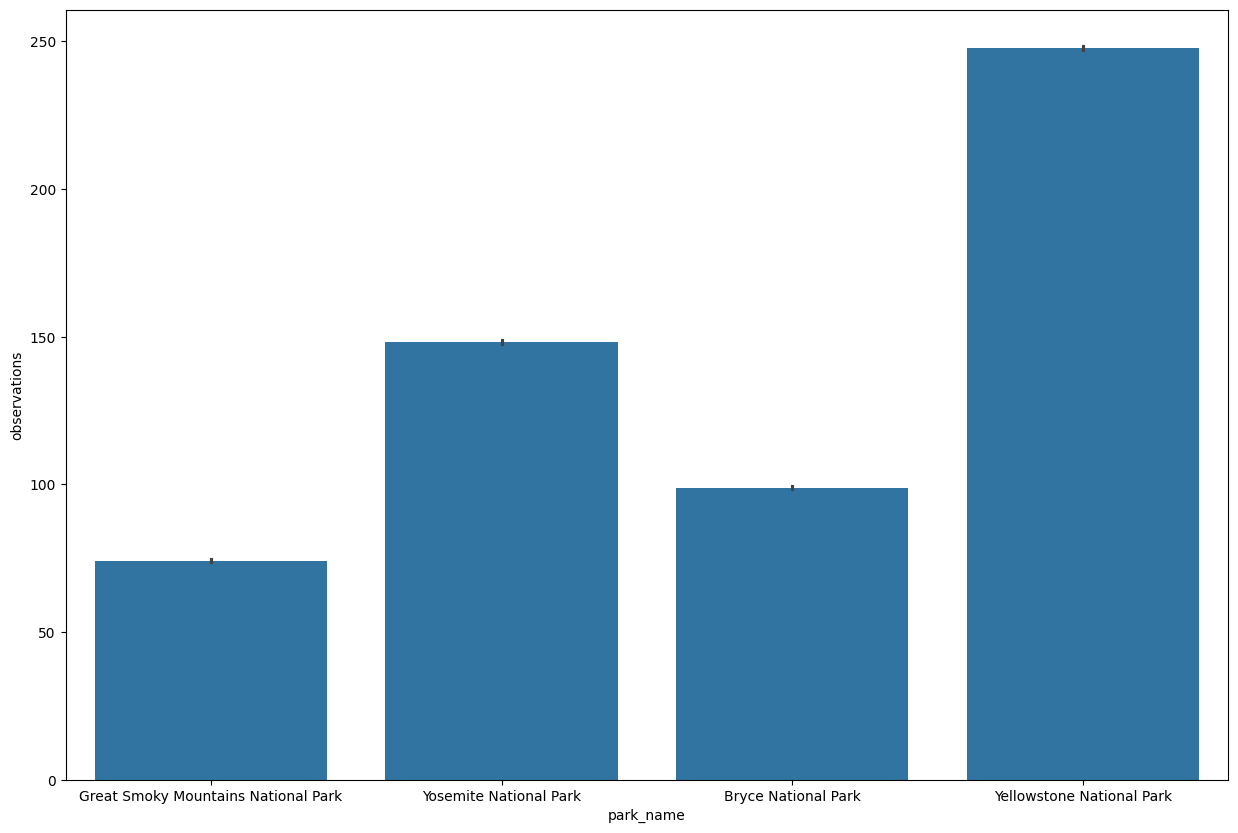

In [103]:
y = df_merged['observations'].groupby(df_merged['park_name']).sum()
x = df_merged['park_name'].unique()

plt.figure(figsize=(15, 10))
sns.barplot(data = df_merged, x = 'park_name', y = 'observations')
plt.xticks(rotation=0)
plt.show()

Questions
---

What is the distribution of conservation_status for animals?

<ipython-input-115-d9de512b388c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_merged['conservation_status'], palette="muted")


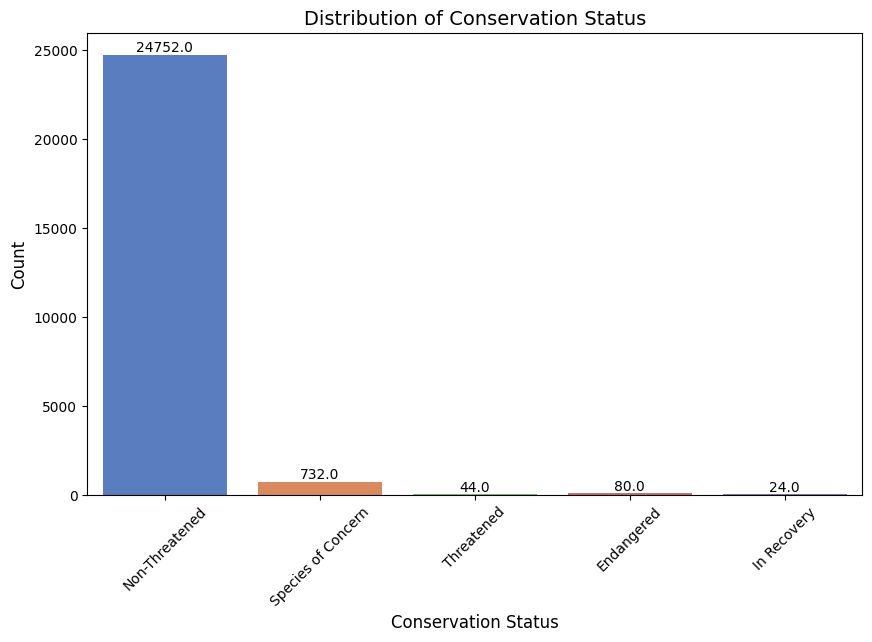

In [115]:
df_merged['conservation_status'] = df_merged['conservation_status'].fillna("Non-Threatened")

plt.figure(figsize=(10,6))
ax = sns.countplot(x=df_merged['conservation_status'], palette="muted")
plt.xticks(rotation=45)
plt.title("Distribution of Conservation Status", fontsize=14)
plt.xlabel("Conservation Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()


Are certain types of species more likely to be endangered?

   conservation_status           category  count
0           Endangered             Mammal     44
1           Endangered               Bird     16
2           Endangered               Fish     12
3           Endangered          Amphibian      4
4           Endangered     Vascular Plant      4
5          In Recovery               Bird     12
6          In Recovery             Mammal     12
7       Non-Threatened     Vascular Plant  19376
8       Non-Threatened               Bird   2016
9       Non-Threatened  Nonvascular Plant   1312
10      Non-Threatened             Mammal    968
11      Non-Threatened               Fish    476
12      Non-Threatened            Reptile    304
13      Non-Threatened          Amphibian    300
14  Species of Concern               Bird    320
15  Species of Concern     Vascular Plant    172
16  Species of Concern             Mammal    168
17  Species of Concern  Nonvascular Plant     20
18  Species of Concern            Reptile     20
19  Species of Conce

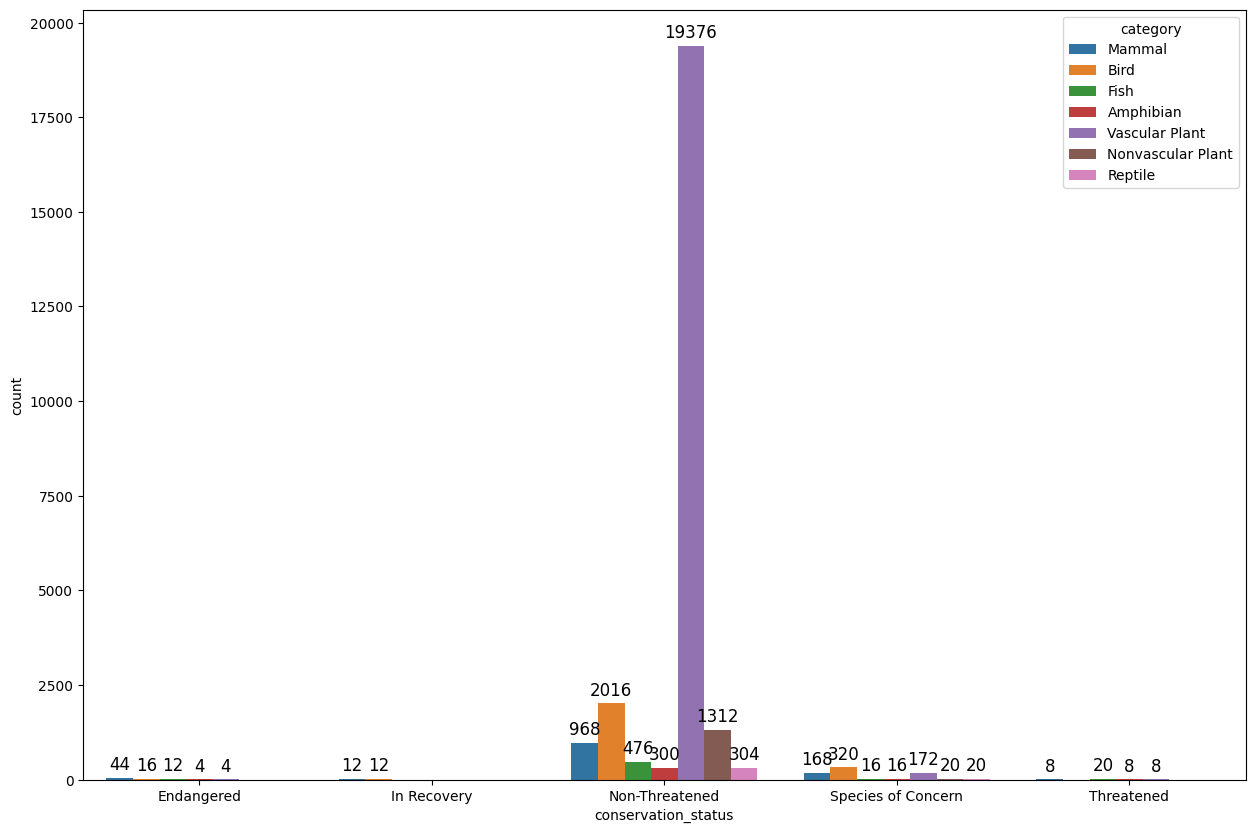

In [105]:
counts = df_merged['category'].groupby(df_merged['conservation_status']).value_counts().reset_index(name='count')
print(counts)
plt.figure(figsize=(15, 10))
ax = sns.barplot(data = counts, x = 'conservation_status', y = 'count', hue='category')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)

# Afficher le graphique
plt.show()

According to the barplot, mammals and birds seem more likely to be endangered. However, Fishes seem to be more threatened.

Where are the most threatened species?

   conservation_status                            park_name  count
0           Endangered                  Bryce National Park     20
1           Endangered  Great Smoky Mountains National Park     20
2           Endangered            Yellowstone National Park     20
3           Endangered               Yosemite National Park     20
4          In Recovery                  Bryce National Park      6
5          In Recovery  Great Smoky Mountains National Park      6
6          In Recovery            Yellowstone National Park      6
7          In Recovery               Yosemite National Park      6
8       Non-Threatened                  Bryce National Park   6188
9       Non-Threatened  Great Smoky Mountains National Park   6188
10      Non-Threatened            Yellowstone National Park   6188
11      Non-Threatened               Yosemite National Park   6188
12  Species of Concern                  Bryce National Park    183
13  Species of Concern  Great Smoky Mountains National Park   

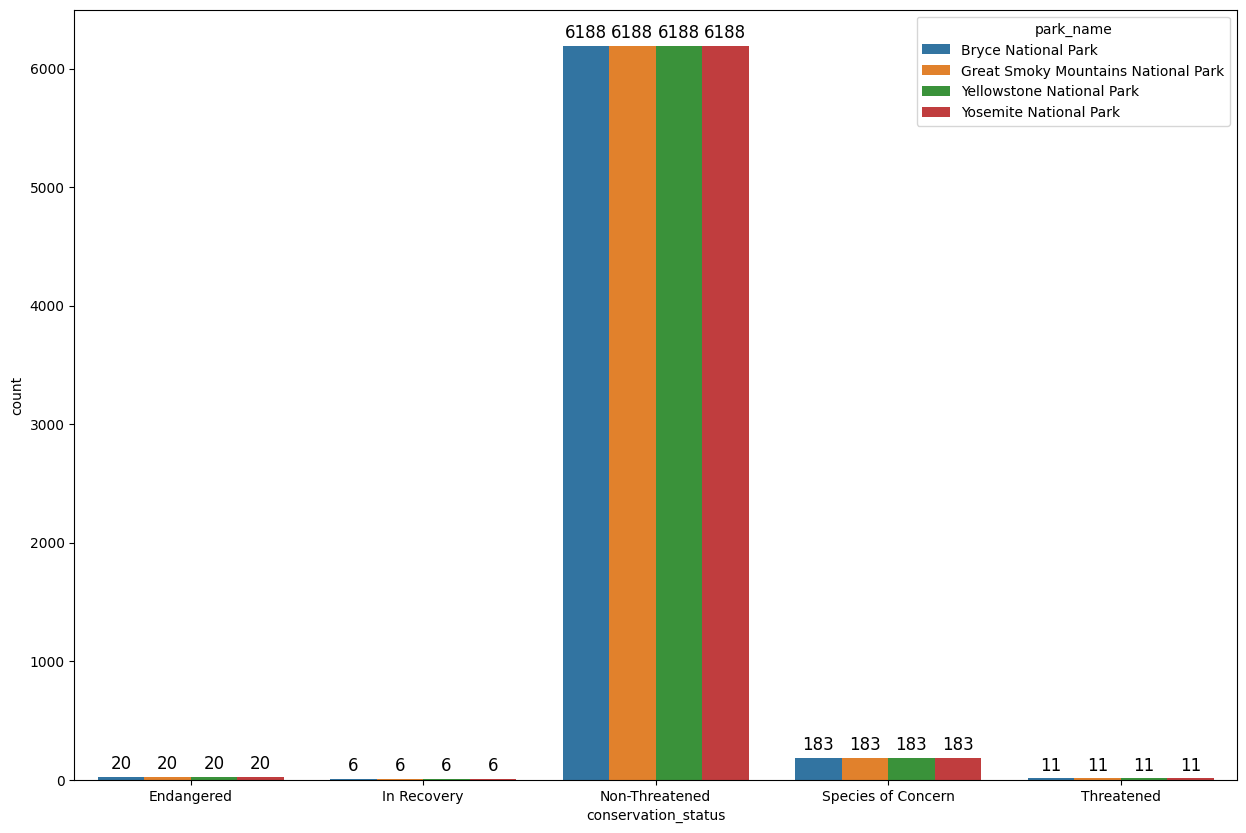

In [106]:
counts = df_merged['park_name'].groupby(df_merged['conservation_status']).value_counts().reset_index(name='count')
print(counts)
plt.figure(figsize=(15, 10))
ax = sns.barplot(data = counts, x = 'conservation_status', y = 'count', hue='park_name')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)

# Afficher le graphique
plt.show()

Are the differences between species and their conservation status significant?

Which species were spotted the most at each park?

In [107]:
#scientific_name	common_names	category	park_name	observations

df_max_rows = df_merged.loc[df_merged.groupby('park_name')['observations'].idxmax()]
display(df_max_rows)

,scientific_name,common_names,category,park_name,observations,conservation_status
14497,Valerianella radiata,"Beaked Corn-Salad, Corn Salad",Vascular Plant,Bryce National Park,176,Non-Threatened
9737,Sonchus asper ssp. asper,Spiny Sowthistle,Vascular Plant,Great Smoky Mountains National Park,147,Non-Threatened
12447,Lycopodium tristachyum,"Deep-Root Clubmoss, Ground Cedar",Vascular Plant,Yellowstone National Park,321,Non-Threatened
7355,Ivesia shockleyi var. shockleyi,"Shockley's Ivesia, Sky Mousetail",Vascular Plant,Yosemite National Park,223,Non-Threatened


Where are most of the endangered species?

In [108]:
endangered_species = df_merged["conservation_status"] == "Endangered"
#endangered_df = df_merged[endangered_species]

park_endangered_counts = endangered_df.groupby('park_name')['conservation_status'].value_counts()
park_endangered_counts = park_endangered_counts.reset_index(name='count')
#display(endangered_df)
display(park_endangered_counts)


,park_name,conservation_status,count
0,Bryce National Park,Endangered,20
1,Great Smoky Mountains National Park,Endangered,20
2,Yellowstone National Park,Endangered,20
3,Yosemite National Park,Endangered,20


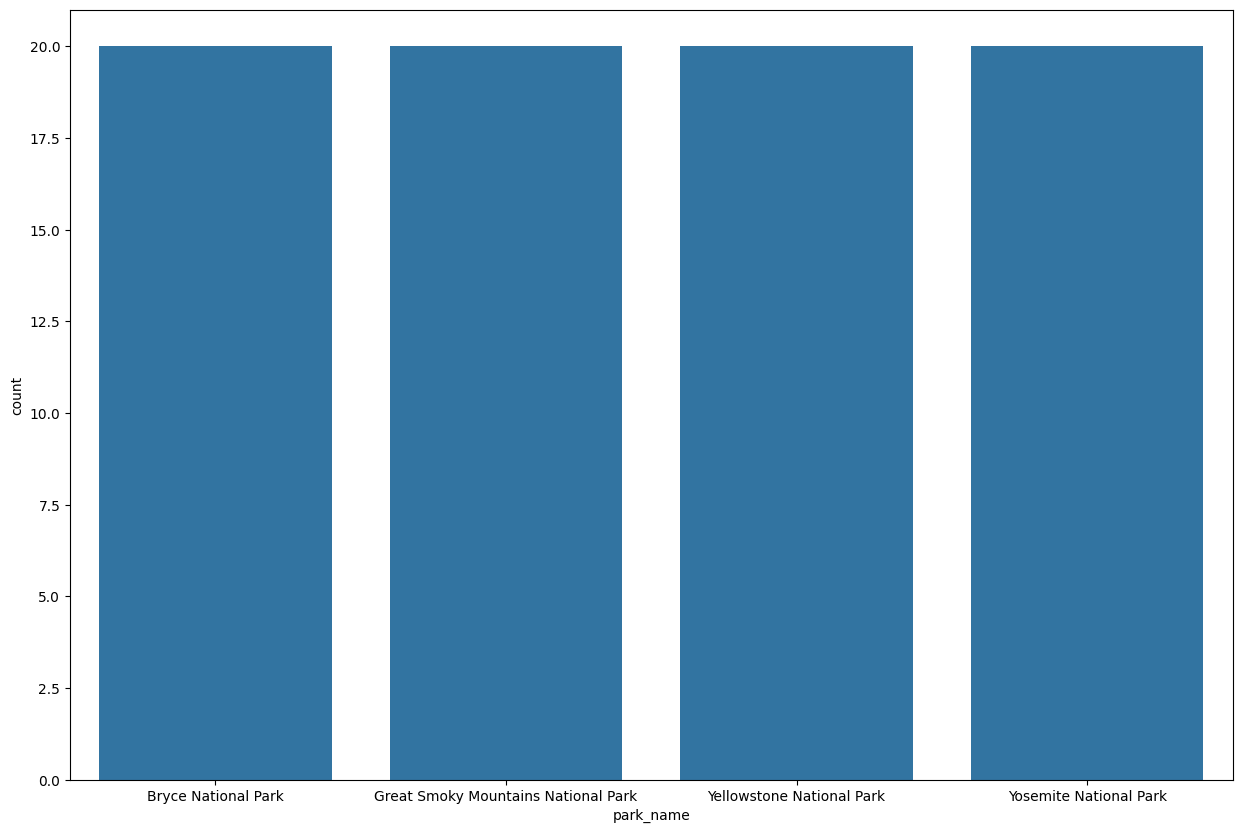

In [109]:
plt.figure(figsize=(15, 10))
sns.barplot(data = park_endangered_counts, x = 'park_name', y = 'count')
plt.xticks(rotation=0)
plt.show()

1. Determine if Species Without a Conservation Status Are Truly Non-Threatened:
* They could be classified as "Non-Threatened" to avoid biases.

2. Analyze the Distribution of Observations:
* Which species are the most observed?
* Do observations vary significantly by park?

In [110]:
top_values = df_merged.nlargest(5, "observations")
display(top_values)

,scientific_name,common_names,category,park_name,observations,conservation_status
12447,Lycopodium tristachyum,"Deep-Root Clubmoss, Ground Cedar",Vascular Plant,Yellowstone National Park,321,Non-Threatened
1299,Castilleja miniata,"Giant Red Indian Paintbrush, Great Red Indian ...",Vascular Plant,Yellowstone National Park,317,Non-Threatened
9637,Dracocephalum parviflorum,American Dragonhead,Vascular Plant,Yellowstone National Park,316,Non-Threatened
22819,Cryptantha fendleri,"Fendler's Cryptantha, Sanddune Catseye, Sanddu...",Vascular Plant,Yellowstone National Park,316,Non-Threatened
7822,Bidens tripartita,"Stick-Tight, Three-Lobe Beggar-Ticks",Vascular Plant,Yellowstone National Park,314,Non-Threatened


In [111]:
for park in df_merged['park_name'].unique():
    park_df = df_merged[df_merged['park_name'] == park]
    top_values = park_df.nlargest(5, "observations")
    print()
    display(top_values)

,scientific_name,common_names,category,park_name,observations,conservation_status
9737,Sonchus asper ssp. asper,Spiny Sowthistle,Vascular Plant,Great Smoky Mountains National Park,147,Non-Threatened
12677,Lespedeza violacea,Violet Bush-Clover,Vascular Plant,Great Smoky Mountains National Park,146,Non-Threatened
22265,Botrychium dissectum,"Cutleaf Grape-Fern, Cut-Leaved Grape Fern",Vascular Plant,Great Smoky Mountains National Park,144,Non-Threatened
13082,Festuca subulata,"Bearded Fescue, Nodding Fescue",Vascular Plant,Great Smoky Mountains National Park,141,Non-Threatened
19101,Branta hutchinsii,Cackling Goose,Bird,Great Smoky Mountains National Park,139,Non-Threatened


,scientific_name,common_names,category,park_name,observations,conservation_status
7355,Ivesia shockleyi var. shockleyi,"Shockley's Ivesia, Sky Mousetail",Vascular Plant,Yosemite National Park,223,Non-Threatened
13831,Lipocarpha micrantha,"Dwarf Bulrush, Smallflower Halfchaff Sedge, Sm...",Vascular Plant,Yosemite National Park,222,Non-Threatened
1786,Trillium rugelii,Southern Nodding Trillium,Vascular Plant,Yosemite National Park,219,Non-Threatened
24385,Artemisia arbuscula ssp. arbuscula,"Gray Low Sagebrush, Little Sagebrush",Vascular Plant,Yosemite National Park,219,Non-Threatened
18457,Castilleja pallescens,"Pale Indian Paintbrush, Pale Paintbrush",Vascular Plant,Yosemite National Park,214,Non-Threatened


,scientific_name,common_names,category,park_name,observations,conservation_status
14497,Valerianella radiata,"Beaked Corn-Salad, Corn Salad",Vascular Plant,Bryce National Park,176,Non-Threatened
21495,Melilotus indica,Sourclover,Vascular Plant,Bryce National Park,173,Non-Threatened
20052,Ericameria bloomeri,"Bloomer's Goldenbush, Rabbitbush",Vascular Plant,Bryce National Park,172,Non-Threatened
4487,Draba oligosperma,"Fewseed Draba, Glacier Draba",Vascular Plant,Bryce National Park,167,Non-Threatened
12234,Martes americana,Pine Marten,Mammal,Bryce National Park,167,Non-Threatened


,scientific_name,common_names,category,park_name,observations,conservation_status
12447,Lycopodium tristachyum,"Deep-Root Clubmoss, Ground Cedar",Vascular Plant,Yellowstone National Park,321,Non-Threatened
1299,Castilleja miniata,"Giant Red Indian Paintbrush, Great Red Indian ...",Vascular Plant,Yellowstone National Park,317,Non-Threatened
9637,Dracocephalum parviflorum,American Dragonhead,Vascular Plant,Yellowstone National Park,316,Non-Threatened
22819,Cryptantha fendleri,"Fendler's Cryptantha, Sanddune Catseye, Sanddu...",Vascular Plant,Yellowstone National Park,316,Non-Threatened
7822,Bidens tripartita,"Stick-Tight, Three-Lobe Beggar-Ticks",Vascular Plant,Yellowstone National Park,314,Non-Threatened


According to 'top_values', the top observed species change according to the park.

3. Explore Threatened Species:
* Where are they primarily observed?
* Is there a correlation between their status and the number of observations?





In [112]:
# Split groups by categories
groupes = [df_merged[df_merged['conservation_status'] == cat]['observations'] for cat in df_merged['conservation_status'].unique()]

# Test ANOVA
f_stat, p_value = stats.f_oneway(*groupes)

print(f"Statistic F : {f_stat}")
print(f"P-value : {p_value}")

Statistic F : 61.86421942237323
P-value : 4.1211891612861455e-52


4.	Create Visualizations:
* Distribution of species categories.
* Comparison between threatened and non-threatened species.